In [19]:
# 데이터파일을 불러서 전체데이터 수와 이탈율 계산

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일
file_path = "../0.data/bank_churner.csv"
data = pd.read_csv(file_path)

# 'is_churned' 열의 값이 1인 데이터의 수를 계산
total_churned = data['is_churned'].sum()

# 전체 데이터의 수를 계산
total_records = len(data)

# 이탈율을 계산
churned_rate = (total_churned / total_records) * 100

# 결과를 출력
print(f"전체 데이터 수: {total_records}")
print(f"이탈 데이터 수: {total_churned}")
print(f"전체 이탈율: {(total_churned / total_records * 100):.2f}%")

전체 데이터 수: 8101
이탈 데이터 수: 1300
전체 이탈율: 16.05%


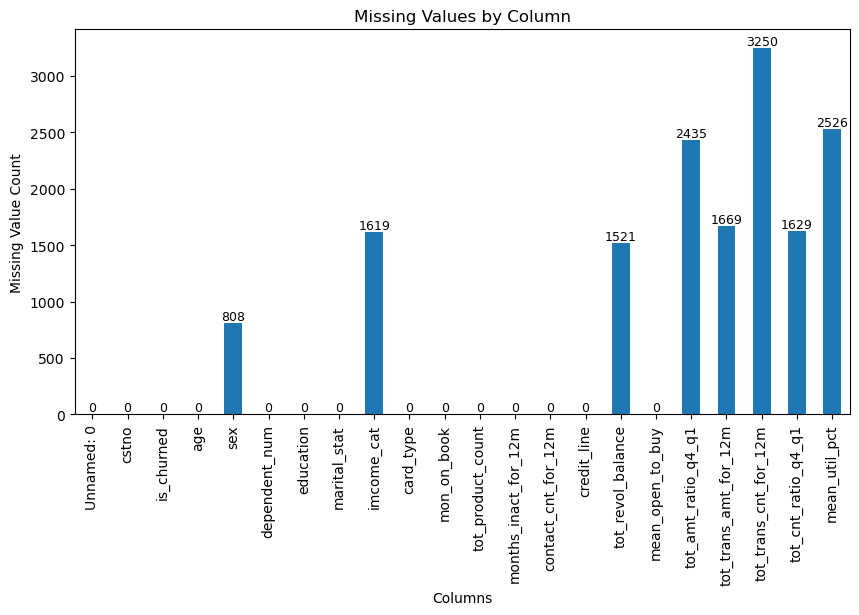

In [20]:
# 각 컬럼별 결측치 갯수를 계산해서 처리 방안 모색

missing_values = data.isnull().sum()

# 그래프
plt.figure(figsize=(10, 5))
ax = missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Values by Column')
plt.xticks(rotation=90)

# 각 컬럼별 결측치 갯수를 그래프 위에 표시
for i, value in enumerate(missing_values):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [21]:
# 결측치 등 처리
# 문자형 변수의 결측치는 일단 Unknown으로 대체
# 숫자형 변수의 결측치는 평균으로 대체
# 신규 컬럼 추가:

import numpy as np
import pandas as pd

# sex, imcome_cat 열에서 빈칸을 "Unknown"으로 대체
data['sex'].fillna('Unknown', inplace=True)
data['imcome_cat'].fillna('Unknown', inplace=True)

# tot_revol_balance 결측치를 0으로 대체
data['tot_revol_balance'].fillna(0, inplace=True)

# 결측치를 각 열의 평균값으로 대체
data['tot_amt_ratio_q4_q1'].fillna(data['tot_amt_ratio_q4_q1'].mean(), inplace=True)
data['tot_trans_amt_for_12m'].fillna(data['tot_trans_amt_for_12m'].mean(), inplace=True)
data['tot_trans_cnt_for_12m'].fillna(data['tot_trans_cnt_for_12m'].mean(), inplace=True)
data['tot_cnt_ratio_q4_q1'].fillna(data['tot_cnt_ratio_q4_q1'].mean(), inplace=True)
data['mean_util_pct'].fillna(data['mean_util_pct'].mean(), inplace=True)

# 나중에 테스트를 하기 위해 결측치 없는 데이터프레임을 churner_test.csv 파일로 저장
data.to_csv('churner_test.csv', index=False)

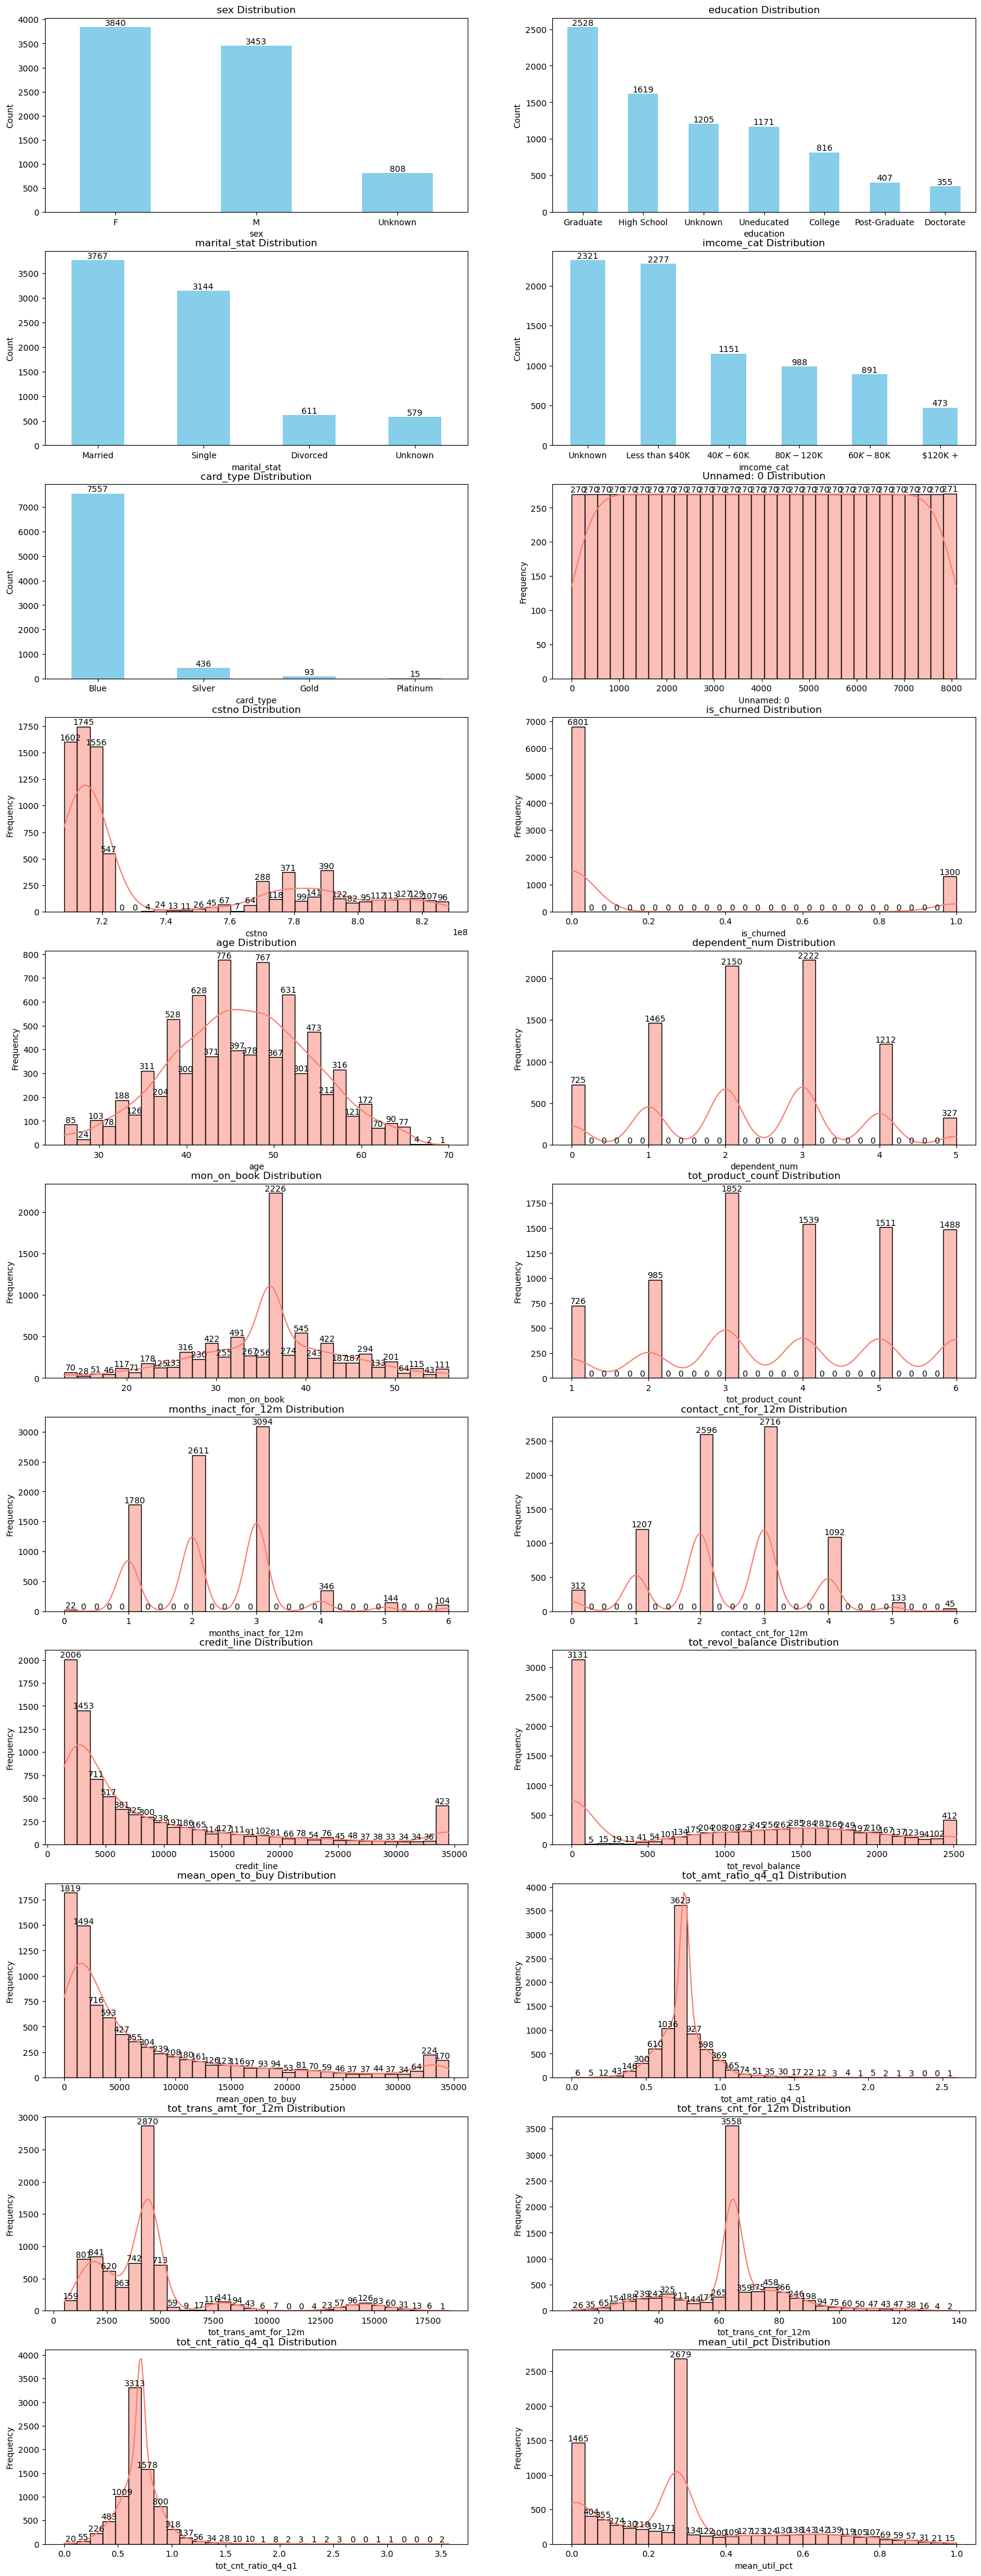

In [22]:
# 각 변수별로 타입별 또는 구간별 분포도 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# 문자형 변수들 선택
categorical_columns = data.select_dtypes(include=['object'])

# 숫자형 변수들 선택
numeric_columns = data.select_dtypes(include=['number'])

# 서브플롯 레이아웃 설정
num_categorical = len(categorical_columns.columns)
num_numeric = len(numeric_columns.columns)
num_plots = num_categorical + num_numeric
num_rows = 20
num_cols = 2

# 그래프 그리기
plt.figure(figsize=(20, 100))

# 문자형 변수에 대한 그래프 그리기
for i, column in enumerate(categorical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    ax = data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=0)
    
    # 각 막대 위에 값을 표시
    for j, v in enumerate(data[column].value_counts()):
        plt.text(j, v, str(v), ha='center', va='bottom', fontsize=10)

# 숫자형 변수에 대한 그래프 그리기
for i, column in enumerate(numeric_columns.columns, num_categorical + 1):
    plt.subplot(num_rows, num_cols, i)
    ax = sns.histplot(data[column], bins=30, kde=True, color='salmon')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=0)
    
    # 각 히스토그램 막대 위에 값을 표시
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')
plt.show()


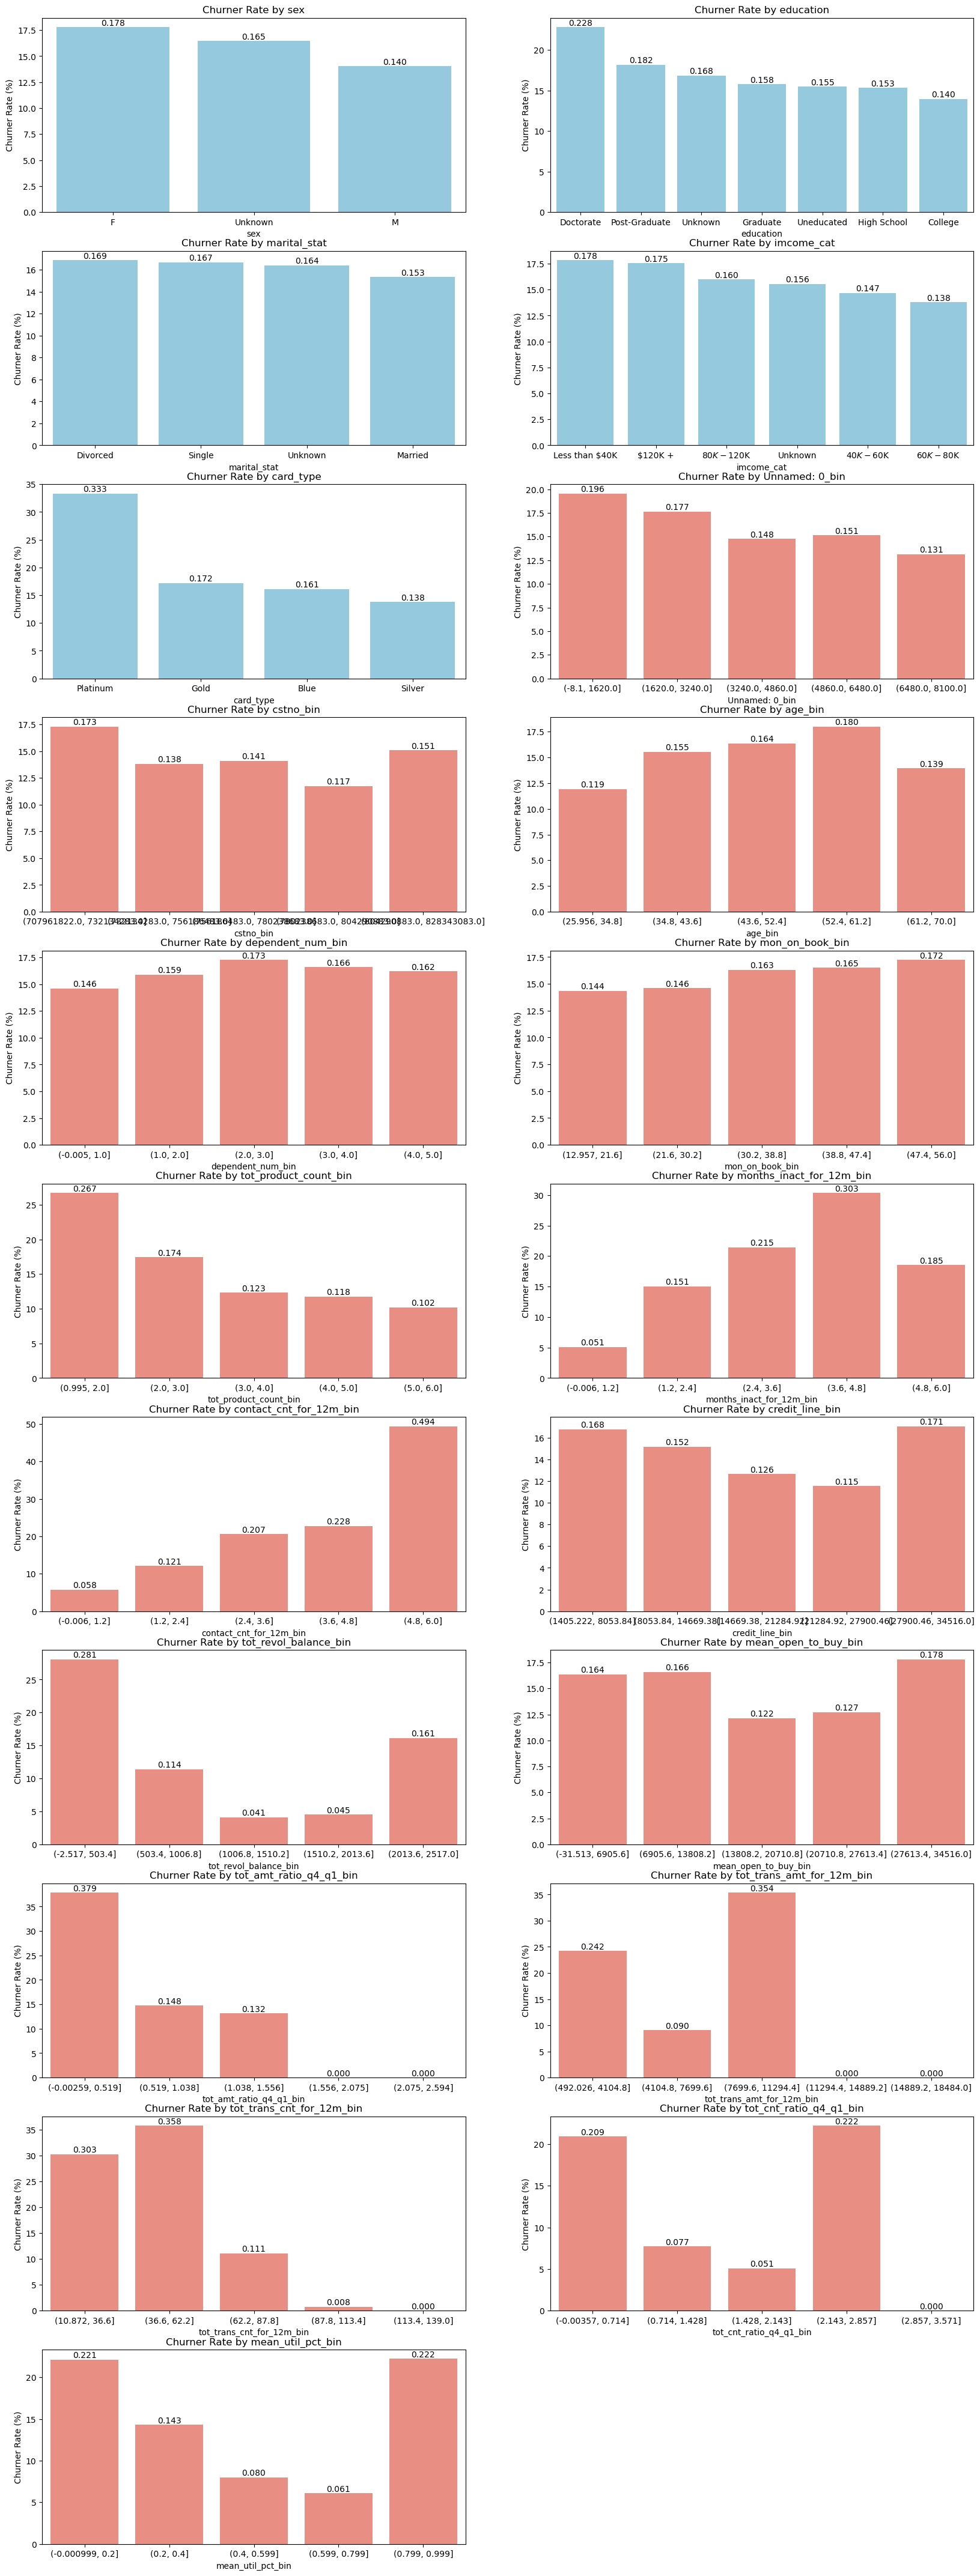

In [23]:
# 각 변수별로 타입별 또는 구간별로 이탈율 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 문자형 변수 선택
categorical_columns = data.select_dtypes(include=['object'])

# 숫자형 변수 선택 (타겟 변수 'is_churned'은 제외)
numeric_columns = data.select_dtypes(include=['number']).drop(columns=['is_churned'])  # is_churned 제외

# 원하는 행 수와 열 수 설정
num_rows = 20  # 행 수
num_cols = 2   # 한 행에 2개의 차트

# 전체 그림 크기 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 100))

# 문자형 변수를 처리하고 이탈율 차트 그리기
for i, cat_column in enumerate(categorical_columns.columns):
    row = i // num_cols
    col = i % num_cols
    
    # 이탈율 계산: is_churned=1 비율
    cat_target_mean = data.groupby(cat_column)['is_churned'].mean().sort_values(ascending=False)
    sns.barplot(x=cat_target_mean.index, y=cat_target_mean.values * 100, color='skyblue', ax=axes[row, col])
    axes[row, col].set_xlabel(cat_column)
    axes[row, col].set_ylabel('Churner Rate (%)')
    axes[row, col].set_title(f'Churner Rate by {cat_column}')
    axes[row, col].tick_params(axis='x', rotation=0)
    
    # 막대 위에 숫자 추가
    for j, v in enumerate(cat_target_mean.values):
        axes[row, col].text(j, v*100, f'{v:.3f}', ha='center', va='bottom', fontsize=10) if pd.notna(v) and np.isfinite(v) else None

# 숫자형 변수를 처리하고 연체율 차트 그리기
for i, num_column in enumerate(numeric_columns.columns):
    row = (i + len(categorical_columns.columns)) // num_cols
    col = (i + len(categorical_columns.columns)) % num_cols
    
    # 숫자형 변수를 5개의 구간으로 분할
    data[num_column + '_bin'] = pd.cut(data[num_column], bins=5)
    
    # 이탈율 계산: is_churned=1인 비율
    num_target_mean = data.groupby(num_column + '_bin')['is_churned'].mean().sort_index()
    sns.barplot(x=num_target_mean.index, y=num_target_mean.values * 100, color='salmon', ax=axes[row, col])
    axes[row, col].set_xlabel(f'{num_column}_bin')
    axes[row, col].set_ylabel('Churner Rate (%)')
    axes[row, col].set_title(f'Churner Rate by {num_column}_bin')
    axes[row, col].tick_params(axis='x', rotation=0)
    
    # 막대 위에 숫자 추가
    for j, v in enumerate(num_target_mean.values):
        axes[row, col].text(j, v*100, f'{v:.3f}', ha='center', va='bottom', fontsize=10) if pd.notna(v) and np.isfinite(v) else None

# 빈 서브플롯 제거
for i in range(num_rows * num_cols):
    if i >= len(categorical_columns.columns) + len(numeric_columns.columns):
        fig.delaxes(axes.flatten()[i])

# 생성한 임시 변수 삭제
data.drop(columns=[num_column + '_bin' for num_column in numeric_columns.columns], inplace=True)

plt.show()

# 결과 데이터 프레임을 엑셀 파일로 저장. 별도 작업. 변수별로 타입별 구간별 이탈율 활용 목적


In [24]:
# 문자형 데이터는 원핫 인코딩으로 숫자로 변환해도 되지만, 새로운 변수 NEW_SCORE 계산 
# 이탈율로 문자형 변수들 대체

# 'sex' 칼럼 값 대체
data['sex'].replace({'F': 17.79, 'Unknown': 16.46, 'M': 14.02}, inplace=True)

# 'education' 칼럼 값 대체
replace_values = {
    'Doctorate': 22.82,
    'Post-Graduate': 18.18,
    'Unknown': 16.85,
    'Graduate': 15.78,
    'Uneducated': 15.46,
    'High School': 15.32,
    'College': 13.97
}
data['education'].replace(replace_values, inplace=True)

# 'imcome_cat' 칼럼 값 대체
replace_values = {
    'Less than $40K': 17.83,
    '$120K +': 17.55,
    '$80K - $120K': 15.99,
    'Unknown': 15.55,
    '$40K - $60K': 14.68,
    '$60K - $80K': 13.80
}
data['imcome_cat'].replace(replace_values, inplace=True)

# 'card_type' 칼럼 값 대체
replace_values = {
    'Platinum': 33.33,
    'Gold': 17.20,
    'Blue': 16.13,
    'Silver': 13.76
}
data['card_type'].replace(replace_values, inplace=True)

# 너무 많은 변수를 넣어면 모델 예측에서 정확도는 높아지지만, 과최적화 우려가 있고
# 이 모델에서는 이탈을 예측해서 방지하고, Sensitivity(Recall)를 높이는게 더욱 중요하므로,
# 변수를 줄이는 대신 문자형 변수들의 이탈율을 곱하여 새로운 변수 NEW_SCORE를 생성

# 'sex', 'education', 'imcome_cat','card_type' 컬럼들의 값을 곱하여 새로운 컬럼 생성
data['NEW_SCORE'] = (
    data['sex'] *
    data['education'] *
    data['imcome_cat'] *
    data['card_type']
)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1343
           1       0.76      0.79      0.77       278

    accuracy                           0.92      1621
   macro avg       0.86      0.87      0.86      1621
weighted avg       0.92      0.92      0.92      1621



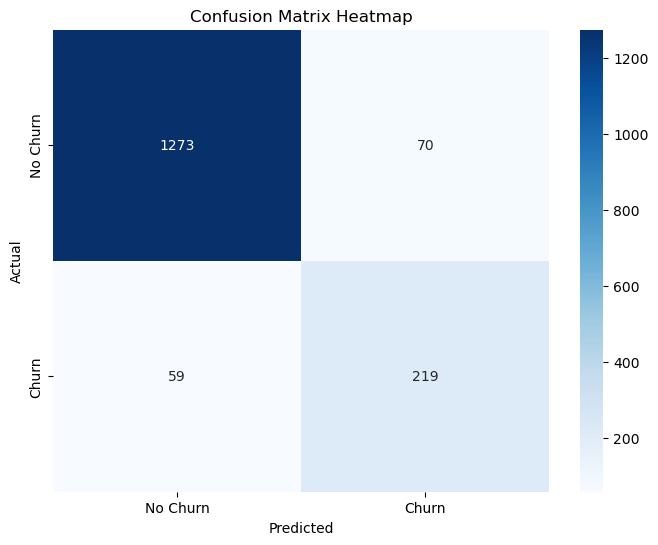

Accuracy: 0.920
Sensitivity (Recall): 0.788
Precision: 0.758


In [25]:
# 랜덤포레스트 모델
# 여러가지 변수 중 가장 중요한 변수 추정 (랜덤포레스트 활용 중요변수 추정 함수 & 실제 테스트를 통해 몇가지 선택)
# 이탈율 예측 모형에서는 Recall 이 중요 (Type2 에러 방지)
# False Negative (FN): 실제로는 Positive(1,연체)인데 모델이 Negative(0,정상)로 예측한 경우에 피해가 더 크므로 Recall 향상이 목표

# 데이터 전체의 이탈율이 16% 수준으로 낮기 때문에 0을 예측할 확률이 훨씬 높음
# "1"을 최대한 많이 예측해서 이탈 고객을 방지하는 것이 더 중요
# 따라서 1을 더 많이 샘플링하는 기법 적용 (클래스 불균형 처리: SMOTE 오버샘플링 적용)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 개발 편의를 위해 원본 데이터를 복사하여 새로운 변수에 저장
data2 = data.copy()

# 필요한 변수 선택: 여러 케이스 중 Recall율을 가장 높이는 변수 선택, Accuracy는 낮아질 수 있음. Trade-off 관계
selected_features = [
    'NEW_SCORE',
    #'sex', 
    #'education', 
    #'imcome_cat',
    #'card_type',    
    #'age', 
    'tot_product_count', 
    'months_inact_for_12m',
    'contact_cnt_for_12m', 
    'tot_revol_balance',
    'tot_amt_ratio_q4_q1', 
    'tot_trans_amt_for_12m',
    'tot_trans_cnt_for_12m', 
    'tot_cnt_ratio_q4_q1', 
    'mean_util_pct',
    'is_churned'
]
data2 = data2[selected_features]

# 독립 변수와 종속 변수 분리
X = data2.drop(columns=['is_churned'])
y = data2['is_churned']

# 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 클래스 불균형 처리 (SMOTE 오버샘플링 적용)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# 랜덤 포레스트 모델 생성 및 학습
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 컨퓨전 매트릭스
confusion = confusion_matrix(y_test, y_pred)

# 컨퓨전 매트릭스 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 주요 성능 평가지표 계산 (정확도, 재현율, 정밀도)
accuracy = (confusion[0,0] + confusion[1,1]) / float(sum(sum(confusion)))
sensitivity = confusion[1,1] / float(confusion[1,1] + confusion[1,0])
precision = confusion[1,1] / float(confusion[1,1] + confusion[0,1])

# 결과 출력
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Precision: {precision:.3f}")

In [26]:
# 테스트를 하기위한 전처리 함수

import pandas as pd

def preprocess_churner_data(filename):
    # 데이터 불러오기
    preprocess_data = pd.read_csv(filename)
    
    # 문자형 데이터는 원핫 인코딩으로 숫자로 변환해도 되지만, 새로운 변수 NEW_SCORE 계산 
    # 이탈율로 문자형 변수들 대체
    
    # 'sex' 칼럼 값 대체
    preprocess_data['sex'].replace({'F': 17.79, 'Unknown': 16.46, 'M': 14.02}, inplace=True)

    # 'education' 칼럼 값 대체
    replace_values = {
        'Doctorate': 22.82,
        'Post-Graduate': 18.18,
        'Unknown': 16.85,
        'Graduate': 15.78,
        'Uneducated': 15.46,
        'High School': 15.32,
        'College': 13.97
    }
    preprocess_data['education'].replace(replace_values, inplace=True)

    # 'imcome_cat' 칼럼 값 대체
    replace_values = {
        'Less than $40K': 17.83,
        '$120K +': 17.55,
        '$80K - $120K': 15.99,
        'Unknown': 15.55,
        '$40K - $60K': 14.68,
        '$60K - $80K': 13.80
    }
    preprocess_data['imcome_cat'].replace(replace_values, inplace=True)

    # 'card_type' 칼럼 값 대체
    replace_values = {
        'Platinum': 33.33,
        'Gold': 17.20,
        'Blue': 16.13,
        'Silver': 13.76
    }
    preprocess_data['card_type'].replace(replace_values, inplace=True)

    # 너무 많은 변수를 넣어면 모델 예측에서 정확도는 높아지지만, 과최적화 우려가 있고
    # 이 모델에서는 연체를 예측해서 걸러내고, Sensitivity(Recall)를 높이는게 더욱 중요하므로,
    # 변수를 줄이는 대신 문자형 변수들의 연체율을 각각 곱하여 새로운 변수 NEW_SCORE를 생성

    # 'sex', 'education', 'imcome_cat','card_type' 컬럼들의 값을 곱하여 새로운 컬럼 생성
    preprocess_data['NEW_SCORE'] = (
        preprocess_data['sex'] *
        preprocess_data['education'] *
        preprocess_data['imcome_cat'] *
        preprocess_data['card_type']
    )
    
    return preprocess_data


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6801
           1       0.95      0.95      0.95      1300

    accuracy                           0.98      8101
   macro avg       0.97      0.97      0.97      8101
weighted avg       0.98      0.98      0.98      8101



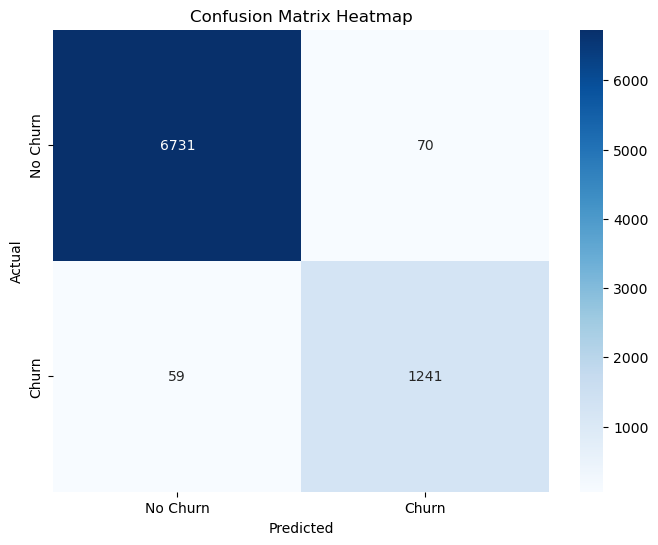

Accuracy: 0.984
Sensitivity (Recall): 0.955
Precision: 0.947


In [27]:
# churner_test.csv 파일을 전처리하고 데이터프레임을 반환
test_data = preprocess_churner_data('churner_test.csv') # <= 테스트할 csv 파일 입력

# 테스트 수행
# 필요한 변수 선택
selected_features = [
    'NEW_SCORE',
    #'sex', 
    #'education', 
    #'imcome_cat',
    #'card_type',    
    #'age', 
    'tot_product_count', 
    'months_inact_for_12m',
    'contact_cnt_for_12m', 
    'tot_revol_balance',
    'tot_amt_ratio_q4_q1', 
    'tot_trans_amt_for_12m',
    'tot_trans_cnt_for_12m', 
    'tot_cnt_ratio_q4_q1', 
    'mean_util_pct',
    'is_churned'
]

test_data = test_data[selected_features]

# 독립 변수와 종속 변수 분리
X_test = test_data.drop(columns=['is_churned'])
y_test = test_data['is_churned']

# 예측 수행
y_pred_test = rf_classifier.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred_test))

# 컨퓨전 매트릭스
confusion = confusion_matrix(y_test, y_pred_test)

# 컨퓨전 매트릭스 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 주요 성능 평가지표 계산 (정확도, 재현율, 정밀도)
accuracy = (confusion[0,0] + confusion[1,1]) / float(sum(sum(confusion)))
sensitivity = confusion[1,1] / float(confusion[1,1] + confusion[1,0])
precision = confusion[1,1] / float(confusion[1,1] + confusion[0,1])

# 결과 출력
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Precision: {precision:.3f}")